In [14]:
# Data Analysis
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
from scipy import sparse

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Text Processing
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Machine Learning packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import sklearn.cluster as cluster
from sklearn.manifold import TSNE

# Model training and evaluation
from sklearn.model_selection import train_test_split

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.naive_bayes import MultinomialNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.over_sampling import SMOTE
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

# Ignore noise warning
import warnings
warnings.filterwarnings("ignore")

C:\Users\guddk\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [41]:
data_set = pd.read_csv('./data/zodiac_data.csv')
data_set

,Unnamed: 0,type,authors,posts
0,0,Libra,bejandaruwallain,|||||||||||||||||||||||||||||||||A career is a...
1,1,Libra,Ricksterscope,\n\nOur second eclipse of 2021 will be a sol...
2,2,Libra,lofiANDcappuccino,||||||||||||||||||||||||Thank you 💜|||||||||||...
3,3,Libra,xSinfulbutterflyx,||||||||||||||||||||||||||||||[removed]|||[rem...
4,4,Scorpio,l6_6l,Supreme Court will not allow same sex marriage...
...,...,...,...,...
1577,378,Virgo,huffdin,Thank you! :)|||Thank you so much! :)|||Thank ...
1578,379,Virgo,Love-M-designs,|||
1579,380,Virgo,Xingjinkai,|||Happiness and love 🥰|||She will connect wit...
1580,381,Virgo,CasLyn817,$9.00 a carton in New Hampshire.|||I didn’t wa...


In [56]:
# posts 가 null 인행 삭제.
data_set[data_set['posts'].isnull()]
for i in data_set[data_set['posts'].isnull()].index:
    data_set.drop(index=[i], inplace=True)

In [57]:
data_set= data_set.reset_index(drop=True)

In [58]:
data_set

,Unnamed: 0,type,authors,posts
0,0,Libra,bejandaruwallain,|||||||||||||||||||||||||||||||||A career is a...
1,1,Libra,Ricksterscope,\n\nOur second eclipse of 2021 will be a sol...
2,2,Libra,lofiANDcappuccino,||||||||||||||||||||||||Thank you 💜|||||||||||...
3,3,Libra,xSinfulbutterflyx,||||||||||||||||||||||||||||||[removed]|||[rem...
4,4,Scorpio,l6_6l,Supreme Court will not allow same sex marriage...
...,...,...,...,...
1532,378,Virgo,huffdin,Thank you! :)|||Thank you so much! :)|||Thank ...
1533,379,Virgo,Love-M-designs,|||
1534,380,Virgo,Xingjinkai,|||Happiness and love 🥰|||She will connect wit...
1535,381,Virgo,CasLyn817,$9.00 a carton in New Hampshire.|||I didn’t wa...


In [59]:
# 필요한 칼럼만 뽑아내서 진행.
data = data_set[['type', 'posts']]

In [60]:
data['type'].value_counts()

Aquarius       259
Capricorn      251
Scorpio        234
Pisces         209
Sagittarius    205
Gemini         110
Aries          102
Taurus          63
Virgo           40
Cancer          32
Leo             28
Libra            4
Name: type, dtype: int64

In [61]:
data.posts[0]

"|||||||||||||||||||||||||||||||||A career is a very important part of every person's life. [Career astrology](https://www.blogsonnet.com/2023/05/09/choose-your-career-according-to-astrology/) provides detailed information about a person's career and related topics based on the date of birth. According to astrology, future events and changes in a person's life can be predicted on the basis of the date and time of birth. If you want to know about your career through astrology, then you should contact an astrologer by mentioning your date, time, and place of birth. They will be given the necessary information to prepare your horoscope and then they will advise you about your career.||||||||||||||||||||||||||||||||||||[Marriage Predictions](https://preview.redd.it/f6vfwmn4v6xa1.png?width=626&amp;format=png&amp;auto=webp&amp;v=enabled&amp;s=e4b9d83a6f3f2f1a5009e67e8f143e69478a7985)\n\nIf you have any marriage-related problems, visit us on the [bejandaruwalla.com](https://bejandaruwalla.com

In [62]:
# df 모양 확인
data.shape

(1537, 2)

In [63]:
types = np.unique(np.array(data_set['type']))
types

array(['Aquarius', 'Aries', 'Cancer', 'Capricorn', 'Gemini', 'Leo',
       'Libra', 'Pisces', 'Sagittarius', 'Scorpio', 'Taurus', 'Virgo'],
      dtype=object)

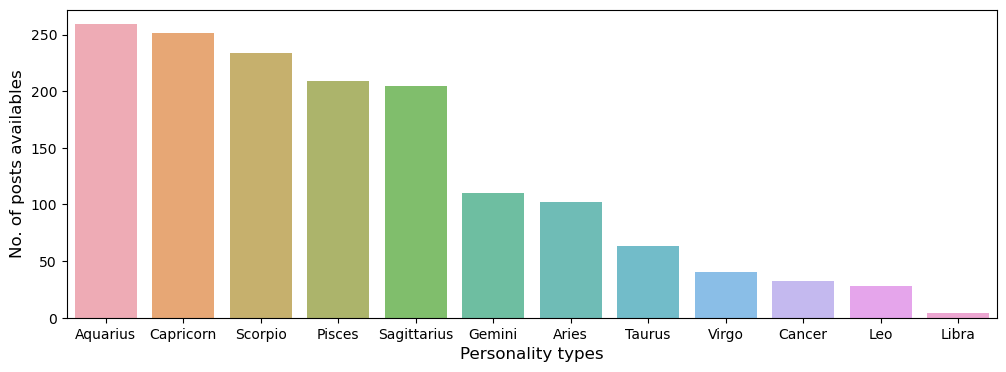

In [64]:
#별자리 타입별 분포 확인.
cnt_srs = data['type'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=cnt_srs.index,y= cnt_srs.values, alpha=0.8)
plt.xlabel('Personality types', fontsize=12)
plt.ylabel('No. of posts availables', fontsize=12)
plt.show()

In [65]:
df = data.copy()

### 전처리 진행

In [66]:
# 전처리용 함수 생성
def clear_text(data):
    data_length=[]
    lemmatizer=WordNetLemmatizer()
    cleaned_text=[]
    for sentence in data.posts:
        
        
#         링크에 해당하는 내용 삭제
        sentence=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence)
    
#         글자를 제외한 특수기호 식제
        sentence=re.sub('[^0-9a-z]',' ',sentence)
    
        sentence=sentence.lower()
        data_length.append(len(sentence.split()))
        cleaned_text.append(sentence)
    return cleaned_text,data_length

In [67]:
data.head(5)

,type,posts
0,Libra,|||||||||||||||||||||||||||||||||A career is a...
1,Libra,\n\nOur second eclipse of 2021 will be a sol...
2,Libra,||||||||||||||||||||||||Thank you 💜|||||||||||...
3,Libra,||||||||||||||||||||||||||||||[removed]|||[rem...
4,Scorpio,Supreme Court will not allow same sex marriage...


In [68]:
# 전처리 진행
data.posts, data_length=clear_text(data)

In [69]:
# 전처리 완료
data.head(5)

,type,posts
0,Libra,career is a...
1,Libra,ur second eclipse of 2021 will be a solar...
2,Libra,hank you ...
3,Libra,removed rem...
4,Scorpio,upreme ourt will not allow same sex marriage...


### 벡터화 진행

In [70]:
class Lemmatizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
    def __call__(self, sentence): # 단어가 3개의 알파벳 이상으로 이루어졌을 때에만 토큰(피처)로 활용하도록!
        return [self.lemmatizer.lemmatize(word) for word in sentence.split() if len(word)>2]

In [71]:
#import nltk
#nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\guddk\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [74]:
train_data,test_data=train_test_split(data,test_size=0.25,random_state=42,stratify=data.type)

In [75]:
vectorizer=TfidfVectorizer(max_features=3000,stop_words='english',tokenizer=Lemmatizer())
vectorizer.fit(train_data.posts)

TfidfVectorizer(max_features=3000, stop_words='english',
                tokenizer=<__main__.Lemmatizer object at 0x000002C54D3B3370>)

In [77]:
import pickle
filename = 'model_xgb_final'
# 모델 불러오기
model_xgb_iqr = pickle.load(open(filename, 'rb'))

In [80]:
zodiac_post = vectorizer.transform(data.posts).toarray()

In [81]:
y_pred2 = model_xgb_iqr.predict(zodiac_post) 

In [82]:
zodiac_post

array([[0.        , 0.        , 0.        , ..., 0.        , 0.06025548,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.04425896, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [83]:
y_pred2

array([10, 11,  9, ..., 10, 15, 15])

In [84]:
data

,type,posts
0,Libra,career is a...
1,Libra,ur second eclipse of 2021 will be a solar...
2,Libra,hank you ...
3,Libra,removed rem...
4,Scorpio,upreme ourt will not allow same sex marriage...
...,...,...
1532,Virgo,hank you hank you so much hank ...
1533,Virgo,
1534,Virgo,appiness and love he will connect wit...
1535,Virgo,9 00 a carton in ew ampshire didn t wa...


In [85]:
df= data.copy()

In [86]:
df = pd.concat([df, pd.DataFrame({'mbti_pred':y_pred2})], axis=1)

In [87]:
mbti = [] #리스트 생성
for row in df['mbti_pred']:
    if row == 0:
        mbti.append('enfp')
    elif row == 1:
        mbti.append('enfj')
    elif row == 2:
        mbti.append('esfp')
    elif row == 3:
        mbti.append('esfj')
    elif row == 4:
        mbti.append('entp')
    elif row == 5:
        mbti.append('entj')
    elif row == 6:
        mbti.append('estp')
    elif row == 7:
        mbti.append('estj')
    elif row == 8:
        mbti.append('infp')
    elif row == 9:
        mbti.append('infj')
    elif row == 10:
        mbti.append('isfp')
    elif row == 11:
        mbti.append('isfj')
    elif row == 12:
        mbti.append('intp')
    elif row == 13:
        mbti.append('intj')
    elif row == 14:
        mbti.append('istp')
    elif row == 15:
        mbti.append('istj')
        
        
df['mbti'] = mbti #grade열에 순차대로 원소를 대입

In [88]:
df

,type,posts,mbti_pred,mbti
0,Libra,career is a...,10,isfp
1,Libra,ur second eclipse of 2021 will be a solar...,11,isfj
2,Libra,hank you ...,9,infj
3,Libra,removed rem...,9,infj
4,Scorpio,upreme ourt will not allow same sex marriage...,9,infj
...,...,...,...,...
1532,Virgo,hank you hank you so much hank ...,9,infj
1533,Virgo,,9,infj
1534,Virgo,appiness and love he will connect wit...,10,isfp
1535,Virgo,9 00 a carton in ew ampshire didn t wa...,15,istj


In [89]:
df.to_csv('zodiac_mbti.csv')